In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'F:\Fingertips\python\TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [26]:
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [27]:
vehicle_age = pd.get_dummies(df['Vehicle_Age'], drop_first=True)

In [28]:
vehicle_damage = pd.get_dummies(df['Vehicle_Damage'], drop_first=True)

In [29]:
df1 = pd.concat([df, gender, vehicle_age, vehicle_damage], axis=1)

In [41]:
df1.drop(['Gender','Vehicle_Damage', 'Vehicle_Age'], axis=1, inplace=True)

In [42]:
df1.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368,0.000999,-0.001194,-0.000464,-0.001507
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147,0.145545,-0.787775,0.220694,0.267534
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155,-0.018374,0.040215,-0.006211,-0.016622
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570,0.000604,-0.044250,0.014555,0.028235
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170,-0.081932,0.358773,-0.191352,-0.824143
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,0.003673,-0.022555,0.061918,0.009349
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042,-0.111159,0.571516,-0.146238,-0.224377
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050,-0.002517,0.002410,0.000600,-0.002064
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000,0.052440,-0.209878,0.109300,0.354400
Male,0.000999,0.145545,-0.018374,0.000604,-0.081932,0.003673,-0.111159,-0.002517,0.052440,1.000000,-0.166280,0.043155,0.091606


<AxesSubplot:>

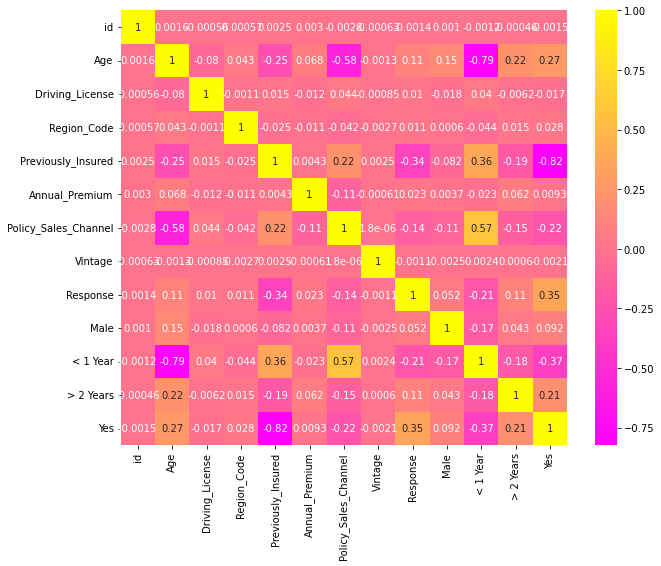

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap='spring')

In [44]:
# Train-Test split
x = df1.iloc[:,:-1]  # independent features
y = df1.iloc[:,-1]  #dependent feature

In [45]:
x.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0


In [46]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Yes, dtype: uint8

In [47]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

In [48]:
# features Scalling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [50]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [52]:
# aaplying Logistic regression
from sklearn.linear_model import LogisticRegression

In [53]:
ls= LogisticRegression()

In [54]:
ls.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = ls.predict(x_test)

In [65]:
## Prediction
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score

In [66]:
print("accuracy score:", accuracy_score(y_pred, y_test))
print("roc-auc score:", roc_auc_score(y_pred,y_test))

accuracy score: 0.9116528036524888
roc-auc score: 0.9143098230859182


In [71]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [75]:
cm = metrics.confusion_matrix(y_test, y_pred)

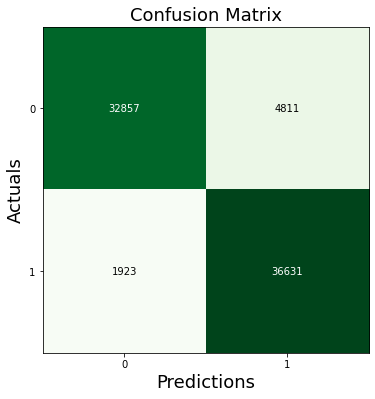

In [76]:
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = ls,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(x_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

F:\Anaconda\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Anaconda\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\Anaconda\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line

Best Accuracy of LR: 91.10 %
Best Parameter of LR: {'C': 0.001, 'penalty': 'l2'}
